In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Definicja funkcji ReLU i jej gradientu

In [2]:
def relu(x):
    """Funkcja ReLU: f(x) = max(0, x)"""
    return np.maximum(0, x)

def relu_gradient(x):
    """Gradient funkcji ReLU"""
    return np.where(x > 0, 1, 0)

## Obliczenia

In [3]:
# zakres wartości
x = np.linspace(-5, 5, 1000)

# obliczam funkcję i gradient
y_relu = relu(x)
y_gradient = relu_gradient(x)

print(f"Zakres x: [{x.min()}, {x.max()}]")
print(f"Zakres ReLU(x): [{y_relu.min()}, {y_relu.max()}]")
print(f"Zakres gradientu: [{y_gradient.min()}, {y_gradient.max()}]")

Zakres x: [-5.0, 5.0]
Zakres ReLU(x): [0.0, 5.0]
Zakres gradientu: [0, 1]


## Wizualizacja

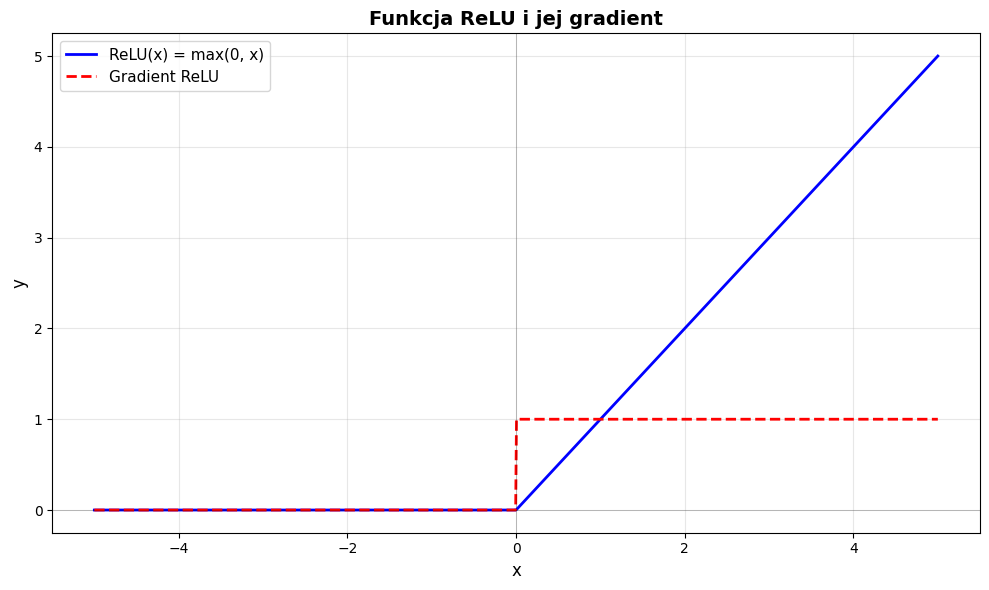

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

# wykres funkcji ReLU
ax.plot(x, y_relu, 'b-', linewidth=2, label='ReLU(x) = max(0, x)')

# wykres gradientu
ax.plot(x, y_gradient, 'r--', linewidth=2, label="Gradient ReLU")

# linie pomocnicze
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)

# oznaczenia
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Funkcja ReLU i jej gradient', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Analiza właściwości

In [5]:
# testowe wartości
test_points = np.array([-3, -1, 0, 1, 3])

print("Wartości funkcji ReLU i gradientu w wybranych punktach:")
print("="*50)
for xi in test_points:
    print(f"x = {xi:4.1f}  ->  ReLU(x) = {relu(xi):4.1f},  gradient = {relu_gradient(xi):4.1f}")

Wartości funkcji ReLU i gradientu w wybranych punktach:
x = -3.0  ->  ReLU(x) =  0.0,  gradient =  0.0
x = -1.0  ->  ReLU(x) =  0.0,  gradient =  0.0
x =  0.0  ->  ReLU(x) =  0.0,  gradient =  0.0
x =  1.0  ->  ReLU(x) =  1.0,  gradient =  1.0
x =  3.0  ->  ReLU(x) =  3.0,  gradient =  1.0


## Porównanie z innymi funkcjami aktywacji

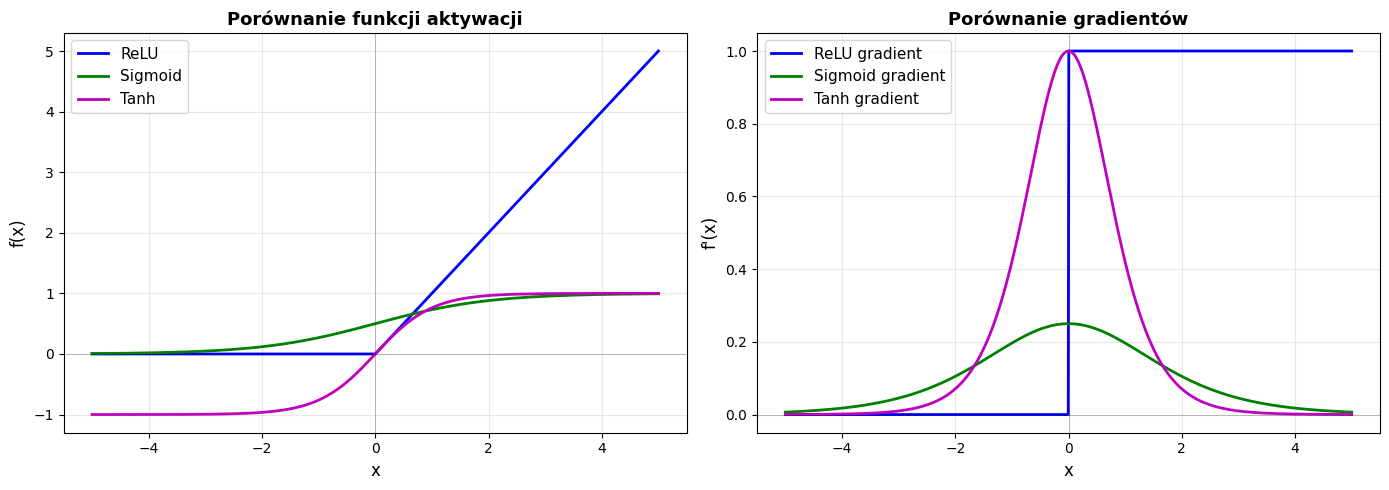

In [6]:
# inne funkcje aktywacji dla porównania
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# wizualizacja
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# porównanie funkcji
ax1.plot(x, y_relu, 'b-', linewidth=2, label='ReLU')
ax1.plot(x, sigmoid(x), 'g-', linewidth=2, label='Sigmoid')
ax1.plot(x, tanh(x), 'm-', linewidth=2, label='Tanh')
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Porównanie funkcji aktywacji', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# porównanie gradientów
sigmoid_grad = sigmoid(x) * (1 - sigmoid(x))
tanh_grad = 1 - tanh(x)**2

ax2.plot(x, y_gradient, 'b-', linewidth=2, label='ReLU gradient')
ax2.plot(x, sigmoid_grad, 'g-', linewidth=2, label='Sigmoid gradient')
ax2.plot(x, tanh_grad, 'm-', linewidth=2, label='Tanh gradient')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f\'(x)', fontsize=12)
ax2.set_title('Porównanie gradientów', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Wnioski

### Właściwości funkcji ReLU

Funkcja ReLU (Rectified Linear Unit) zdefiniowana jako **f(x) = max(0, x)** posiada następujące cechy:

1. **Prostota obliczeniowa**: ReLU jest bardzo prosta do implementacji i szybka w obliczeniach
2. **Gradient**:
   - f'(x) = 1 dla x > 0
   - f'(x) = 0 dla x < 0
   - W punkcie x = 0 gradient jest nieokreślony (przyjmuje się 0)

3. **Nieliniowość**: Mimo prostoty, ReLU wprowadza nieliniowość do sieci neuronowej

4. **Problem zanikającego gradientu**: ReLU nie cierpi na problem zanikającego gradientu dla x > 0, ponieważ gradient wynosi 1

### Zastosowania funkcji ReLU

1. **Sieci neuronowe głębokie (Deep Learning)**:
   - Warstwy ukryte w sieciach konwolucyjnych (CNN)
   - Sieci w zadaniach rozpoznawania obrazów
   - Warstwy w sieciach do przetwarzania języka naturalnego

2. **Computer Vision**:
   - Klasyfikacja obrazów (ResNet, VGG, AlexNet)
   - Detekcja obiektów (YOLO, Faster R-CNN)
   - Segmentacja semantyczna

3. **Zalety w stosunku do sigmoid i tanh**:
   - Brak problemu zanikającego gradientu
   - Szybsze uczenie (sparse activation - tylko część neuronów aktywna)
   - Niższy koszt obliczeniowy

4. **Ograniczenia**:
   - Problem "umierających neuronów" (dying ReLU) - neurony z x < 0 mogą przestać się uczyć
   - Nie jest centrowana wokół zera
   - Rozwiązania: Leaky ReLU, PReLU, ELU

### Podsumowanie

ReLU jest obecnie najpopularniejszą funkcją aktywacji w głębokich sieciach neuronowych ze względu na swoją prostotę, efektywność obliczeniową i skuteczność w rozwiązywaniu problemu zanikającego gradientu. Jest domyślnym wyborem dla większości architektur sieci konwolucyjnych.